In [9]:
pip install numpy==1.23.5

   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/14.6 MB 8.5 MB/s eta 0:00:02
   ---------- ----------------------------- 3.9/14.6 MB 13.8 MB/s eta 0:00:01
   ----------------- ---------------------- 6.6/14.6 MB 13.0 MB/s eta 0:00:01
   ------------------------- -------------- 9.2/14.6 MB 13.0 MB/s eta 0:00:01
   ----------------------------------- ---- 12.8/14.6 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------- 14.6/14.6 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.10.1 requires absl-py>=0.4, which is not installed.
tensorboard 2.10.1 requires google-auth<3,>=1.6.3, which is not installed.
tensorboard 2.10.1 requires requests<3,>=2.21.0, which is not installed.
tensorboard 2.10.1 requires tensorboard-data-server<0.7.0,>=0.6.0, which is not installed.
tensorboard 2.10.1 requires tensorboard-plugin-wit>=1.6.0, which is not installed.
tensorboard 2.10.1 requires werkzeug>=1.0.1, which is not installed.
tensorflow-gpu 2.10.0 requires absl-py>=1.0.0, which is not installed.
tensorflow-gpu 2.10.0 requires astunparse>=1.6.0, which is not installed.
tensorflow-gpu 2.10.0 requires gast<=0.4.0,>=0.2.1, which is not installed.
tensorflow-gpu 2.10.0 requires google-pasta>=0.1.1, which is not installed.
tensorflow-gpu 2.10.0 requires ker

In [ ]:
pip install scikit-learn==1.1.0 --no-deps

In [ ]:
pip install pandas==1.3.5


In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import skew, kurtosis, mode

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("scipy version:", scipy.__version__)
print("scikit-learn version:", sklearn.__version__)


numpy version: 1.26.4
pandas version: 2.2.3
scipy version: 1.14.1
scikit-learn version: 1.5.2


In [8]:
pip install tensorflow==2.10


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow-gpu==2.10


  Using cached tensorflow_gpu-2.10.0-cp310-cp310-win_amd64.whl.metadata (3.1 kB)
Using cached tensorflow_gpu-2.10.0-cp310-cp310-win_amd64.whl (455.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.10.0
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
pip uninstall tensorflow tensorflow-gpu -y


Found existing installation: tensorflow 2.10.0Note: you may need to restart the kernel to use updated packages.

Uninstalling tensorflow-2.10.0:
  Successfully uninstalled tensorflow-2.10.0
Found existing installation: tensorflow-gpu 2.10.0
Uninstalling tensorflow-gpu-2.10.0:
  Successfully uninstalled tensorflow-gpu-2.10.0


In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'  # Enable verbose logs

import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Available devices:", tf.config.list_physical_devices())

if tf.test.is_built_with_cuda():
    print("TensorFlow is built with CUDA support.")
else:
    print("TensorFlow is NOT built with CUDA support.")

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print("GPU is available:", gpus)
else:
    print("No GPU found. Running on CPU.")


TensorFlow version: 2.10.0
Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow is built with CUDA support.
GPU is available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [16]:
import tensorflow as tf

# Create a small TensorFlow operation to force computation
with tf.device('/GPU:0'):  # Explicitly use GPU
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[5.0, 6.0], [7.0, 8.0]])
    result = tf.matmul(a, b)  # Matrix multiplication (should run on GPU)
    
print("Result:", result)
print("TensorFlow is using:", result.device)  # Should print GPU device


Result: tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)
TensorFlow is using: /job:localhost/replica:0/task:0/device:GPU:0


In [18]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3259931258601691376
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2254123828
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12803305339234765483
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [5]:
import tensorflow as tf

# List physical GPUs
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Devices: ", tf.config.list_physical_devices())


Num GPUs Available:  1
Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Load the datasets
data_18_noleak = pd.read_csv('Accelerometer_readings/LO_NL_0.18 LPS_A2.csv')
data_noFlow_noleak = pd.read_csv('Accelerometer_readings/LO_NL_ND_A2.csv')
data_47_noleak = pd.read_csv('Accelerometer_readings/LO_NL_0.47 LPS_A2.csv')

data_18_gasket = pd.read_csv('Accelerometer_readings/LO_GL_0.18 LPS_A2.csv')
data_gasket_noFlow = pd.read_csv('Accelerometer_readings/LO_GL_ND_A2.csv')
data_47_nd = pd.read_csv('Accelerometer_readings/LO_GL_0.47 LPS_A2.csv')

# Combine No Leak and Leak data
no_leak_data = pd.concat([data_18_noleak , data_noFlow_noleak , data_47_noleak])
no_leak_data['Category'] = 'No Leak'

gasket_leak_data = pd.concat([data_18_gasket , data_gasket_noFlow , data_47_nd])
gasket_leak_data['Category'] = 'Leak'

# Combine all data
combined_data = pd.concat([no_leak_data ,gasket_leak_data ]).reset_index(drop=True)

In [18]:
num_rows = combined_data.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 5558650


In [6]:
from scipy.stats import skew, kurtosis
import numpy as np
import pandas as pd

def extract_features(df):
    features = pd.DataFrame()

    # Time-Domain Features
    features['Mean'] = df['Value'].rolling(window=6).mean()
    features['Std'] = df['Value'].rolling(window=6).std()
    features['Min'] = df['Value'].rolling(window=6).min()
    features['Max'] = df['Value'].rolling(window=6).max()
    features['Skewness'] = df['Value'].rolling(window=6).apply(lambda x: skew(x.dropna()), raw=False)
    features['Kurtosis'] = df['Value'].rolling(window=6).apply(lambda x: kurtosis(x.dropna()), raw=False)
    features['PeakToPeak'] = features['Max'] - features['Min']
    features['Median'] = df['Value'].rolling(window=6).median()
    features['Mode'] = df['Value'].rolling(window=6).apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    features['FirstQuartile'] = df['Value'].rolling(window=6).quantile(0.25)
    features['ThirdQuartile'] = df['Value'].rolling(window=6).quantile(0.75)
    features['RootMeanSquare'] = np.sqrt((df['Value'] ** 2).rolling(window=6).mean())
    features['RootSumSquares'] = np.sqrt((df['Value'] ** 2).sum())
    features['PeakToRMS'] = features['PeakToPeak'] / features['RootMeanSquare']
    features['Variance'] = df['Value'].rolling(window=6).var()

    # Frequency-Domain Features (from FFT)
    df_fft = np.fft.fft(df['Value'].fillna(0))  # Fill NA for FFT calculation
    fft_abs = np.abs(df_fft)
    features['FFT_Mean'] = np.mean(fft_abs)
    features['FFT_Std'] = np.std(fft_abs)
    features['FFT_Min'] = np.min(fft_abs)
    features['FFT_Max'] = np.max(fft_abs)
    features['FFT_Skewness'] = skew(fft_abs)
    features['FFT_Kurtosis'] = kurtosis(fft_abs)
    features['FFT_PeakToPeak'] = np.ptp(fft_abs)

   

    # Drop rows with NaN caused by rolling operations
    features = features.dropna()

    return features


In [7]:
# Extract features
features = extract_features(combined_data)

# Add category labels
features['Category'] = combined_data['Category'][features.index]  # Ensure alignment

# Convert category to binary (0: No Leak, 1: Leak)
features['Category'] = features['Category'].map({'No Leak': 0, 'Leak': 1})

# Separate features and labels
X = features.drop(columns=['Category'])
y = features['Category']

# Feature scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [23]:
conda install -c rapidsai -c nvidia -c conda-forge cuml=23.02 python=3.8 cudatoolkit=11.2


Retrieving notices: ...working... done
Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - cuml=23.02*

Current channels:

  - https://conda.anaconda.org/rapidsai
  - https://conda.anaconda.org/nvidia
  - https://conda.anaconda.org/conda-forge
  - defaults

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.





Channels:
 - rapidsai
 - nvidia
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... failed


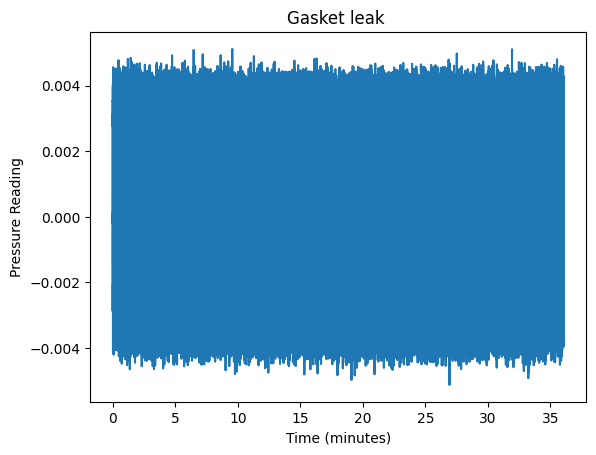

In [ ]:


# Plot the filtered data
plt.plot(gasket_leak_data['Sample'], gasket_leak_data['Value'])
plt.title('Gasket leak ')
plt.xlabel('Time (minutes)')
plt.ylabel('Accelerometer Reading')
plt.show()


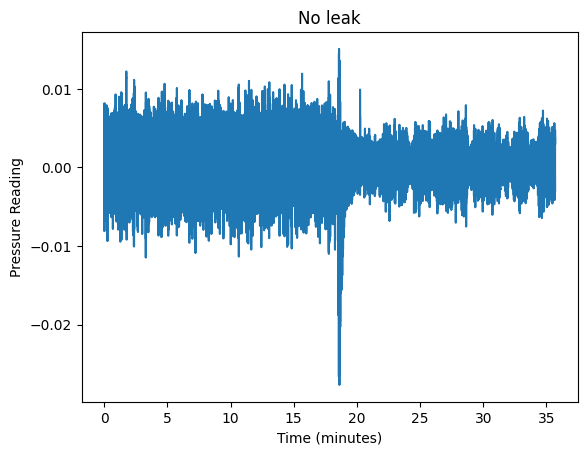

In [ ]:

plt.plot(no_leak_data['Sample'], no_leak_data['Value'])
plt.title('No leak')
plt.xlabel('Time (minutes)')
plt.ylabel('Accelerometer Reading')
plt.show()

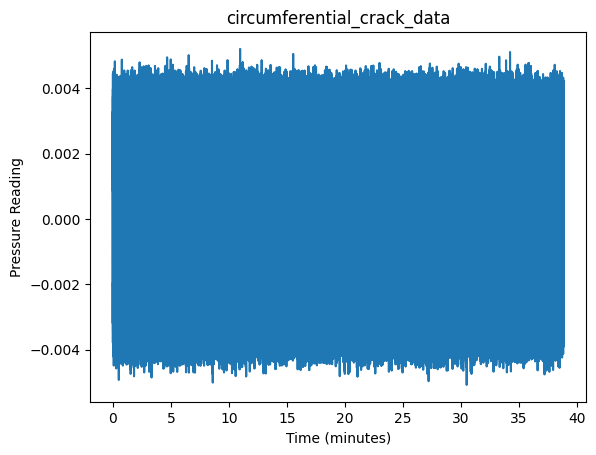

In [ ]:

plt.plot(circumferential_crack_data['Sample'], circumferential_crack_data['Value'])
plt.title('circumferential_crack_data')
plt.xlabel('Time (minutes)')
plt.ylabel('Pressure Reading')
plt.show()

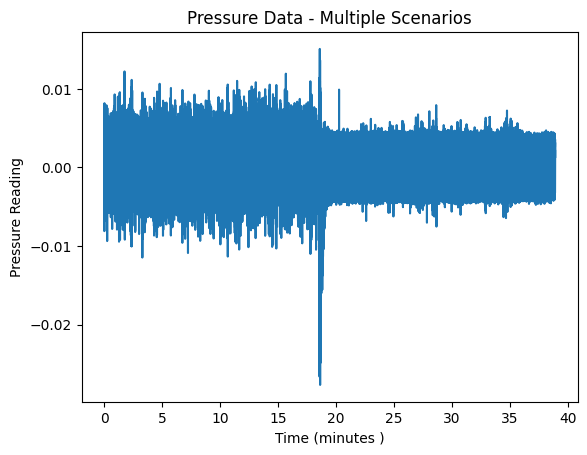

In [ ]:

plt.plot(combined_data['Sample'], combined_data['Value'])
plt.title('Pressure Data - Multiple Scenarios')
plt.xlabel('Time (minutes )')
plt.ylabel('Pressure Reading')
plt.show()

In [ ]:

print(X_train[:50])  


             Mean       Std       Min       Max  Skewness  Kurtosis  \
1303266  0.563220  0.027997  0.561875  0.564024  0.484440  0.112725   
1002736  0.480077  0.021742  0.479310  0.480407  0.458062  0.405441   
1855650  0.386953  0.025291  0.386917  0.387281  0.519651  0.187354   
932390   0.468126  0.018697  0.469579  0.467688  0.574564  0.097424   
1608545  0.596777  0.020062  0.596735  0.596863  0.490123  0.177617   
4481146  0.460299  0.290825  0.429270  0.512094  0.641537  0.231729   
5005989  0.378625  0.098530  0.364755  0.388653  0.377892  0.214801   
1336589  0.401892  0.091587  0.390615  0.413013  0.454300  0.199615   
1631607  0.493269  0.023604  0.491593  0.492979  0.295634  0.441703   
1027260  0.351508  0.012786  0.353881  0.349590  0.556722  0.090651   
3611804  0.564954  0.462710  0.496194  0.625512  0.469929  0.095685   
2521597  0.543715  0.052261  0.539373  0.549442  0.615565  0.195255   
4164716  0.465053  0.126039  0.447661  0.485334  0.586056  0.324400   
286549

In [10]:
# ... [Keep all previous code up to feature scaling] ...

# ============================================
# NEW: Bagged Trees Model Setup
# ============================================
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Base estimator (individual decision tree)
base_tree = DecisionTreeClassifier(
    max_depth=10,  # Deeper trees for complex patterns
    min_samples_split=5,  # Reduce overfitting
    class_weight='balanced'  # Handle class imbalance
)

# Bagging ensemble
model = BaggingClassifier(
    base_estimator=base_tree,
    n_estimators=200,  # Number of trees (increased for stability)
    max_samples=0.8,  # 80% data sampling per tree
    max_features=0.8,  # 80% feature sampling per tree
    bootstrap=True,  # Bootstrap sampling
    bootstrap_features=False,  # Keep feature sampling without replacement
    n_jobs=-1,  # Use all CPU cores
    random_state=42
)

# ============================================
# Model Training & Evaluation (Same as Before)
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [ ]:
# Predictions and evaluation
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.8321650330251347
Confusion Matrix:
 [[466857  87656]
 [ 98931 458285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83    554513
           1       0.84      0.82      0.83    557216

    accuracy                           0.83   1111729
   macro avg       0.83      0.83      0.83   1111729
weighted avg       0.83      0.83      0.83   1111729



In [ ]:
model.save("model.h5")


In [ ]:
model.save("Accelerometer.keras")
